<a href="https://colab.research.google.com/github/jackson119/new_cifar_10/blob/main/new__cifar10_3(0.0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [22]:
from tensorflow.keras.datasets import cifar10
import numpy as np
np.random.seed(10)

In [23]:
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [24]:
print("train data:","images:",x_img_train.shape,"labels:",y_label_train.shape)
print("test data:","images:",x_img_test.shape,"labels:",y_label_test.shape)

train data: images: (50000, 32, 32, 3) labels: (50000, 1)
test data: images: (10000, 32, 32, 3) labels: (10000, 1)


# standardize and perform one hot encoding

In [25]:
x_img_train_normalize=x_img_train.astype('float32')/255.0
x_img_test_normalize=x_img_test.astype('float32')/255.0

In [26]:
from tensorflow.keras import utils

In [27]:
y_label_train_OneHot=utils.to_categorical(y_label_train)
y_label_test_OneHot=utils.to_categorical(y_label_test)

# Images and label

In [28]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [29]:
# Construct model
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D

In [30]:
model=Sequential()

In [31]:
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(Dropout(0.0))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [32]:
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Dropout(0.0))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [33]:
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Dropout(0.0))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [34]:
### neural network
model.add(Flatten())
model.add(Dropout(0.0))
### hidden layer 1
model.add(Dense(2500,activation='relu'))
model.add(Dropout(0.0))
### hidden layer 2
model.add(Dense(1500,activation='relu'))
model.add(Dropout(0.0))
### output layer
model.add(Dense(10,activation='softmax'))

In [35]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)       

In [36]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history=model.fit(x_img_train_normalize,y_label_train_OneHot,validation_split=0.2,epochs=50,batch_size=300,verbose=2)

Epoch 1/50
134/134 - 34s - loss: 1.7456 - accuracy: 0.3538 - val_loss: 1.4112 - val_accuracy: 0.4857
Epoch 2/50
134/134 - 3s - loss: 1.2987 - accuracy: 0.5246 - val_loss: 1.1985 - val_accuracy: 0.5595
Epoch 3/50
134/134 - 3s - loss: 1.0539 - accuracy: 0.6227 - val_loss: 1.0276 - val_accuracy: 0.6259
Epoch 4/50
134/134 - 3s - loss: 0.8530 - accuracy: 0.6954 - val_loss: 0.8804 - val_accuracy: 0.6947
Epoch 5/50
134/134 - 3s - loss: 0.6955 - accuracy: 0.7540 - val_loss: 0.7915 - val_accuracy: 0.7258
Epoch 6/50
134/134 - 3s - loss: 0.5547 - accuracy: 0.8055 - val_loss: 0.7702 - val_accuracy: 0.7378
Epoch 7/50
134/134 - 3s - loss: 0.4267 - accuracy: 0.8511 - val_loss: 0.8090 - val_accuracy: 0.7510
Epoch 8/50
134/134 - 3s - loss: 0.3075 - accuracy: 0.8913 - val_loss: 0.8488 - val_accuracy: 0.7553
Epoch 9/50
134/134 - 3s - loss: 0.2093 - accuracy: 0.9255 - val_loss: 0.9596 - val_accuracy: 0.7499
Epoch 10/50
134/134 - 3s - loss: 0.1497 - accuracy: 0.9476 - val_loss: 1.0495 - val_accuracy: 0.748

In [37]:
from matplotlib import pyplot as plt
def show_train_history(train_history,train,validation):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train History')
  plt.ylabel('train')
  plt.xlabel('Epoch')
  plt.legend(['train','validation'],loc='upper left')
  plt.show()

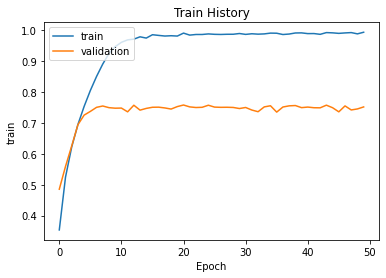

In [38]:
show_train_history(train_history,'accuracy','val_accuracy')

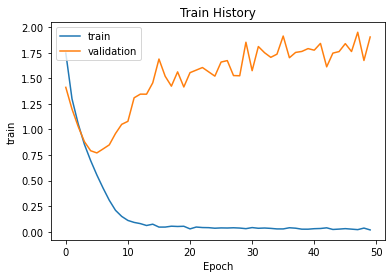

In [39]:
show_train_history(train_history,'loss','val_loss')

In [40]:
### estimate model accuracy

In [41]:
scores=model.evaluate(x_img_test_normalize,y_label_test_OneHot,verbose=0)

In [43]:
print(f'Test loss: {scores[0]} / Test accuracy: {scores[1]}')

Test loss: 1.904371738433838 / Test accuracy: 0.7556999921798706


In [44]:
prediction=model.predict_classes(x_img_test_normalize) ### prediction

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [45]:
prediction

array([3, 8, 8, ..., 5, 1, 7])

In [46]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
  fig=plt.gcf()
  fig.set_size_inches(12,14)
  if num>25:num=25
  for i in range(0,num):
    ax=plt.subplot(5,5,1+i)
    ax.imshow(images[idx],cmap='binary')
    title=str(i) +',' +label_dict[labels[i][0]]
    if len(prediction)>0:
      title+='=>'+label_dict[prediction[i]]
    ax.set_title(title,fontsize=10)
    ax.set_xticks([]);ax.set_yticks([])
    idx+=1
  plt.show()

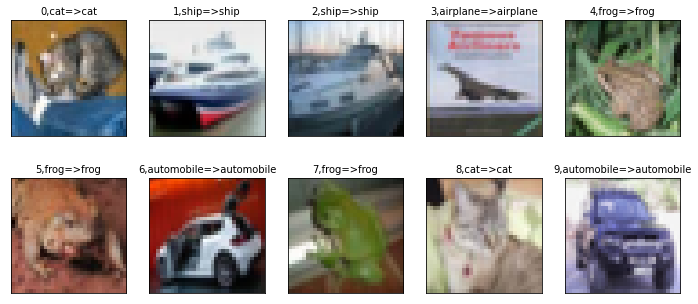

In [47]:
plot_images_labels_prediction(x_img_test,y_label_test,prediction,0,10)

In [48]:
# check for prediction rate
predicted_Probability=model.predict(x_img_test_normalize)

In [49]:
def show_predicted_probability(y,prediction,x_img,predicted_Probability,i):
  print('label:',label_dict[y[i][0]],
        'predict',label_dict[prediction[i]])
  plt.figure(figsize=(2,2))
  plt.imshow(np.reshape(x_img_test[i],(32,32,3)))
  plt.show()
  for j in range(10):
    print(label_dict[j]+ ' probability:%1.9f'%(predicted_Probability[i][j]))


label: cat predict cat


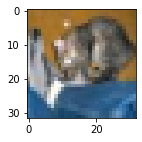

airplane probability:0.000000000
automobile probability:0.000000000
bird probability:0.000000000
cat probability:0.999199927
deer probability:0.000000000
dog probability:0.000800066
frog probability:0.000000003
horse probability:0.000000000
ship probability:0.000000050
truck probability:0.000000000


In [50]:
show_predicted_probability(y_label_test,prediction,x_img_test,predicted_Probability,0)

#Confusion matrix

In [51]:
import pandas as pd

In [52]:
pd.crosstab(y_label_test.reshape(-1),prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,819,23,36,16,9,6,13,8,33,37
1,11,898,3,3,2,4,7,0,14,58
2,63,7,642,55,70,53,58,36,10,6
3,25,9,46,493,52,191,78,51,27,28
4,25,2,53,60,703,25,49,70,7,6
5,15,6,33,147,40,641,25,68,10,15
6,9,3,25,35,30,25,844,7,12,10
7,17,7,17,23,37,39,7,843,1,9
8,68,30,7,6,3,4,9,5,840,28
